In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/data.csv')

In [3]:
df.shape

(9506, 8)

In [4]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Pulsar 180cc 2016,2016,19718.0,first,bangalore,65.0,17.00,55000.0
1,Jawa Perak 330cc 2020,2020,2000.0,first,bangalore,NaN,30.00,197500.0
2,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,2020,NaN,first,hyderabad,40.0,20.21,130500.0
3,KTM Duke 200cc 2012,2012,24561.0,third,bangalore,35.0,25.00,63400.0
4,Royal Enfield Bullet Electra 350cc 2011,2011,38998.0,first,bangalore,40.0,19.80,95000.0


In [5]:
df.describe()

,model_year,kms_driven,mileage,power,price
count,9506.000000,6943.000000,8385.000000,8958.000000,9.466000e+03
mean,2015.245529,24215.077488,46.662819,18.808411,8.399280e+04
std,3.818901,30124.771545,16.831523,8.989003,7.709274e+04
min,1950.000000,0.000000,5.000000,7.000000,2.000000e+03
25%,2014.000000,9500.000000,35.000000,14.000000,4.000000e+04
50%,2016.000000,18000.000000,40.000000,19.000000,6.950000e+04
75%,2018.000000,30000.000000,60.000000,21.000000,1.150000e+05
max,2021.000000,1000000.000000,104.000000,197.300000,3.000000e+06


# Handle model_name

### There are too many models, let try to create a brand category using the model name.

In [6]:
df['brand'] = df['model_name'].apply(lambda x: ' '.join(x.split()[:1]))

In [7]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
5449,Royal Enfield Thunderbird 500cc 2016,2016,7900.0,first,pune,25.0,27.2,137999.0,Royal
1529,Bajaj Pulsar 150cc 2019,2019,NaN,first,jodhpur,65.0,15.0,68000.0,Bajaj
7066,Hero Karizma ZMR 223cc 2014,2014,24340.0,first,pune,48.0,20.0,41000.0,Hero
5339,Yamaha FZ 150cc 2015,2015,NaN,first,pune,58.0,13.0,65000.0,Yamaha
5516,Royal Enfield Bullet Electra Twinspark 350cc 2016,2016,6500.0,first,delhi,35.0,19.8,108000.0,Royal


In [8]:
df.brand.value_counts()

Bajaj               2695
Royal               2124
Hero                1090
Yamaha               943
TVS                  725
Honda                672
KTM                  624
Suzuki               279
UM                   150
Jawa                  55
Mahindra              41
Harley-Davidson       36
Hyosung               19
Husqvarna             13
Benelli               11
Kawasaki               9
BenelliImperiale       6
Fb                     4
Ducati                 3
Triumph                2
Yazdi                  1
BMW                    1
yamaha                 1
MV                     1
Aprilia                1
Name: brand, dtype: int64

### We can also extract the engine details as cc from model_name

In [9]:
import re
def extract_cc(val):
    match =  re.search(r"\d{2,}(cc)", val) 
    if match:
        return match.group().replace('cc','')
    else:
        return None
    

df['engine'] = df['model_name'].apply(extract_cc)

In [10]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,engine
3275,Bajaj Pulsar 150cc 2007,2007,NaN,first,rajsamand,65.0,14.85,10500.0,Bajaj,150
7652,Yamaha YZF-R15 150cc 2016,2016,9711.0,first,ludhiana,42.0,16.00,85000.0,Yamaha,150
4677,Royal Enfield Classic 350cc 2017,2017,19300.0,first,ernakulam,35.0,19.80,125000.0,Royal,350
9380,Bajaj Pulsar 220cc 2016,2016,22000.0,first,mumbai,38.0,21.00,63000.0,Bajaj,220
4539,KTM RC 200cc 2016,2016,7500.0,first,kota,35.0,25.10,150000.0,KTM,200


### We can now drop the model_name feature

In [11]:
df = df.drop('model_name',axis=1)

# Handle model_year

We can use model_year to calculate the age of the bike, Age might give us the better results or representation

In [12]:
from datetime import date
current_year = date.today().year

df['age'] = df.model_year.apply(lambda x: current_year - x if x else None )

### Let's drop the model_year

In [13]:
df = df.drop('model_year',axis=1)

# Handle kms_driven

### Missing values will be hanled latter

# Handle owner

In [14]:
# remove whitespace
df['owner'] = df.owner.str.strip()

In [15]:
df.owner.unique()

array(['first', 'third', 'second', 'fourth'], dtype=object)

In [16]:
print(df.owner.isnull().sum())

0


### Let's leave here only other things will handle during encoding

# Handle location

In [17]:
df.location.value_counts()[:10]

delhi        1750
mumbai        925
bangalore     918
pune          435
chennai       415
hyderabad     412
gurgaon       379
jaipur        373
ahmedabad     305
faridabad     210
Name: location, dtype: int64

## Let's take only top 5 locations and make other as 'others'

In [18]:
top_locations = df.location.value_counts().index[:5]
print(top_locations)

Index(['delhi', 'mumbai', 'bangalore', 'pune', 'chennai'], dtype='object')


In [19]:
df['location'] = df.location.apply(lambda x: x if x in top_locations else 'other')

# Handle mileage

### Nothing to do much here,missing values will be handle latter

# Handle power

### Nothing to do much here,missing values will be handle latter

# Handle brand

In [20]:
# Let's check how may brands we get
print('Unique Brands :',len(df['brand'].unique()))
df['brand'].value_counts()[:10]

Unique Brands : 25


Bajaj     2695
Royal     2124
Hero      1090
Yamaha     943
TVS        725
Honda      672
KTM        624
Suzuki     279
UM         150
Jawa        55
Name: brand, dtype: int64

### Let's take only top 10 brands as our base brand & make other as 'other' category

In [21]:
top_brands = df['brand'].value_counts().index[:10]
df['brand'] = df['brand'].apply(lambda x: x if x in top_brands else 'other')

### Let's change the 'Royal' to 'Royal Enfield' as the actual brand

In [22]:
df['brand'] = df.brand.str.replace('Royal','Royal Enfield')

# Reorder the columns

In [23]:
# new_order = ['brand','model_year','kms_driven','owner','location','price']
# new_order = [6,0,1,2,3,4,6,7,8,5]
# df = df[df.columns[new_order]]

In [24]:
df.sample(4)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
3122,2500.0,first,other,35.0,18.76,131000.0,Bajaj,None,1
2929,21322.0,first,other,42.0,16.00,30000.0,Yamaha,150,11
1276,NaN,first,bangalore,35.0,23.19,42500.0,Bajaj,200,9
3846,NaN,first,other,65.0,14.85,20000.0,Bajaj,150,15


# Outlier Detection

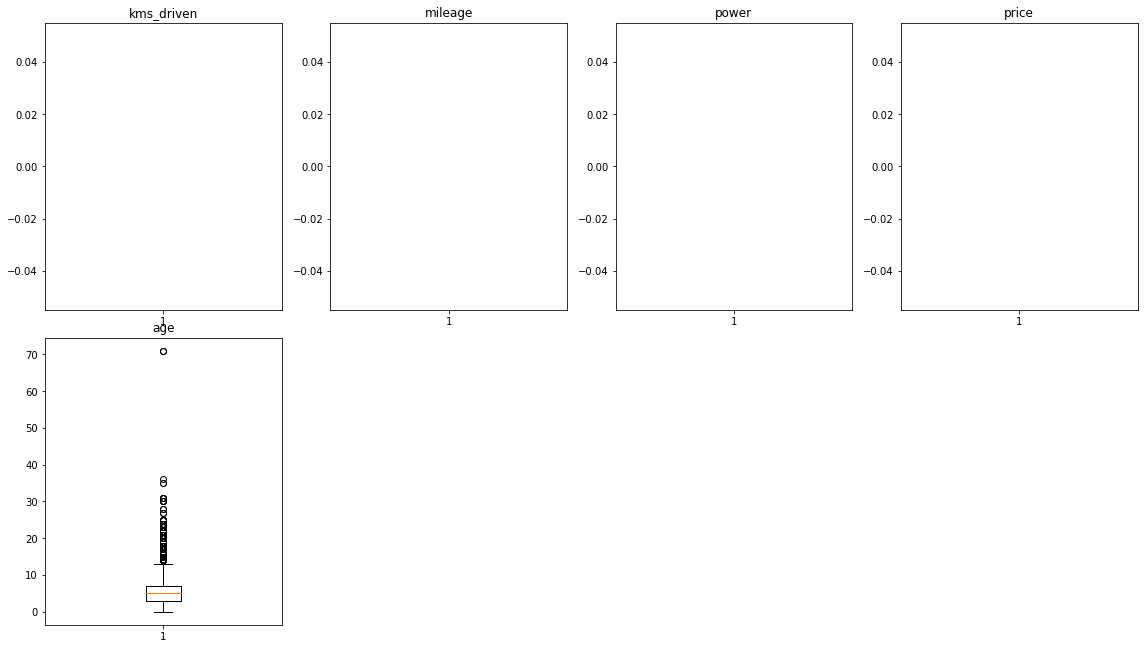

In [25]:
def box_plot(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    # outlier detection using boxplot
    plt.figure(figsize=(16,22))

    for i, variable in enumerate(numeric_columns):
        plt.subplot(5,4,i+1)
        plt.boxplot(df[variable],whis=1.5)
        plt.tight_layout()
        plt.title(variable)

    plt.show()

box_plot(df)

## kms_driven

In [26]:
max_val = df['kms_driven'].quantile(.99)

min_val = df['kms_driven'].quantile(.1)

df = df[(df['kms_driven'] <= max_val) & (df['kms_driven'] > min_val)]

In [27]:
df.shape

(6187, 9)

<AxesSubplot:>

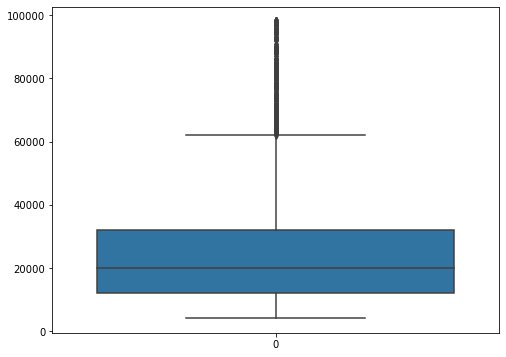

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df['kms_driven'])

## Mileage

In [29]:
# max_val = df['mileage'].quantile(.99)

# min_val = df['mileage'].quantile(.1)

# df = df[(df['mileage'] <= max_val) & (df['mileage'] > min_val)]

<AxesSubplot:ylabel='mileage'>

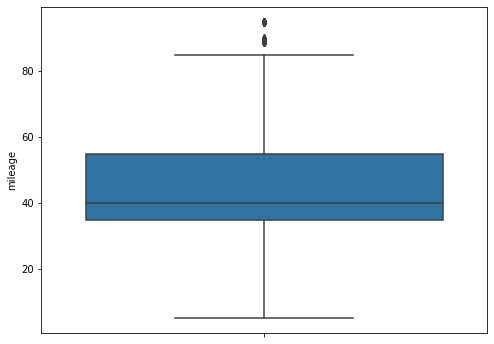

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['mileage'])

## Power

In [31]:
# plt.figure(figsize=(8,6))
# sns.boxplot(y=df['power'])

## Age

<AxesSubplot:ylabel='age'>

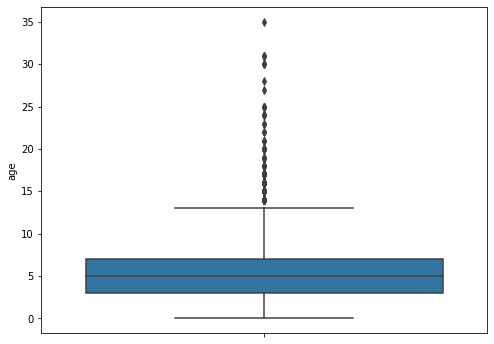

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

### More than 20 years old bikes are not that much good enough to be bought by anyone,let's take only age upto 20 years.

In [33]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
5304,12872.0,first,pune,NaN,33.0,270000.0,other,None,2
244,46740.0,first,mumbai,38.0,21.0,40000.0,Bajaj,None,6
2875,16000.0,first,mumbai,42.0,16.0,96000.0,Yamaha,150,4


In [34]:
df = df[df['age'] <= 20]

In [35]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
6334,90000.0,first,other,81.0,8.2,12200.0,Hero,100,14
2393,13210.0,first,delhi,35.0,19.0,85000.0,Bajaj,None,3
4521,31000.0,first,other,35.0,19.8,100000.0,Royal Enfield,350,7


<AxesSubplot:ylabel='age'>

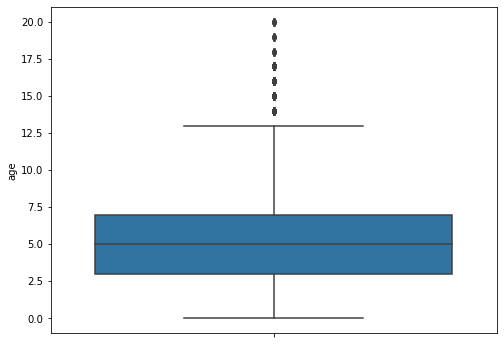

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

## Price

In [37]:
max_val = df['price'].quantile(.99)

min_val = df['price'].quantile(.1)

# df = df[(df['price'] <= max_val) & (df['price'] > min_val)]

In [38]:
df[~(df['price'] <= max_val) & (df['price'] > min_val)]

,kms_driven,owner,location,mileage,power,price,brand,engine,age
493,60000.0,second,other,18.0,65.00,545000.0,other,None,8
734,6770.0,first,other,NaN,42.30,314800.0,KTM,None,1
1253,6000.0,first,bangalore,NaN,47.00,290000.0,Royal Enfield,650,4
1282,10500.0,first,delhi,15.0,139.00,760000.0,other,None,2
1328,12000.0,first,bangalore,NaN,47.00,300000.0,Royal Enfield,650,4
...,...,...,...,...,...,...,...,...,...
9042,15300.0,first,mumbai,42.0,16.70,985625.0,Yamaha,150,4
9244,5000.0,second,delhi,20.0,72.68,310000.0,other,None,5
9299,10619.0,first,other,20.0,47.00,345000.0,other,None,6
9317,5800.0,second,other,20.0,47.00,280000.0,other,None,6


<AxesSubplot:ylabel='price'>

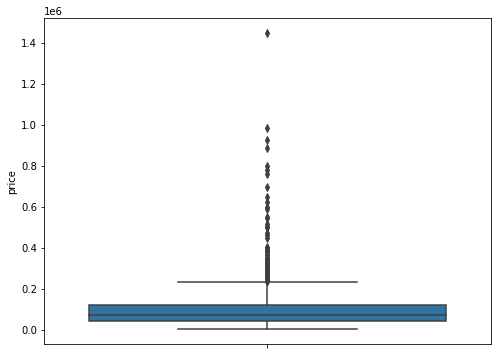

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['price'])

In [40]:
df.sample(5)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
8176,5394.0,first,mumbai,40.0,17.03,125000.0,Honda,None,1
1490,12200.0,second,bangalore,42.0,16.70,70000.0,Yamaha,150,8
9224,5411.0,second,other,35.0,24.80,125000.0,UM,None,4
7045,50000.0,first,other,NaN,NaN,6000.0,other,110,15
8788,18000.0,first,mumbai,25.0,42.90,150000.0,KTM,390,1


In [41]:
df.shape

(6159, 9)

In [42]:
df.isnull().sum()

kms_driven       0
owner            0
location         0
mileage        744
power          454
price           30
brand            0
engine        1160
age              0
dtype: int64

In [43]:
# fill price with mean
df.price.fillna(df.price.mean(),inplace=True)

In [44]:
df.shape

(6159, 9)

## Save

In [45]:
## Save the processed data
df.to_csv('../data/processed/processed.csv',index=False)